# Task 1: Instructions
- Load in the dataset with the yearly number of deaths.
- Import the pandas module.
- Read in datasets/yearly_deaths_by_clinic.csv and assign it to the variable yearly.
- Print out yearly.

In [1]:
import pandas as pd

In [2]:
yearly=pd.read_csv('yearly_deaths_by_clinic.csv')

In [3]:
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


# Task 2: Instructions
Calculate the yearly proportion of deaths.
- Calculate the proportion of deaths per number of births and store the result in the new column   yearly["proportion_deaths"].
- Extract the rows from clinic 1 into yearly1 and the rows from clinic 2 into yearly2.
- Print out yearly1.

In [4]:
yearly = yearly.assign(proportion_deaths = lambda x: (x['deaths'] /x['births']) )
yearly

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [7]:
yearly1=yearly.loc[yearly['clinic']=='clinic 1',:]
yearly2=yearly.loc[yearly['clinic']=='clinic 2',:]

In [8]:
print(yearly1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


# Task 3: Instructions
Plot the yearly proportion of deaths for both clinics.
- Plot proportion_deaths by year for the two clinics in a single plot. Use the DataFrame plot method.
- Label the plotted lines using the label argument to plot.
- Save the Axes object returned by the plot method into the variable ax.
- Change the y-axis label to "Proportion deaths".

Text(0, 0.5, 'Proportion deaths')

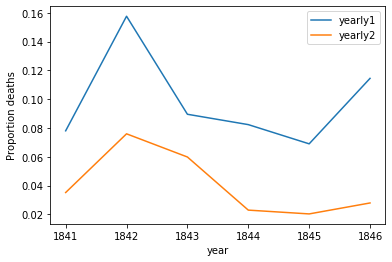

In [10]:
ax = yearly1.plot(x="year", y="proportion_deaths",
              label="yearly1")
yearly2.plot(x="year", y="proportion_deaths",
         label="yearly2", ax=ax)
ax.set_ylabel("Proportion deaths")

# Task 4: Instructions
Load in the dataset with the monthly number of deaths for Clinic 1.
- Read in datasets/monthly_deaths.csv and assign it to the variable monthly. Make sure to tell read_csv to parse the date column as a date.
- Calculate the proportion of deaths per number of births and store the result in the new column monthly["proportion_deaths"].
- Print out the first rows in monthly using the head() method.

In [13]:
monthly=pd.read_csv('monthly_deaths.csv', parse_dates=['date'])
monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [15]:
monthly = monthly.assign(proportion_deaths = lambda x: (x['deaths'] /x['births']) )


,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


In [16]:
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


# Task 5: Instructions
Plot the monthly proportion of deaths for Clinic 1.
- Plot proportion_deaths by date for the monthly date using the DataFrame plot method.
- Save the Axes object returned by the plot method into the variable ax.
- Change the y-axis label to "Proportion deaths"

Text(0, 0.5, 'Proportion deaths')

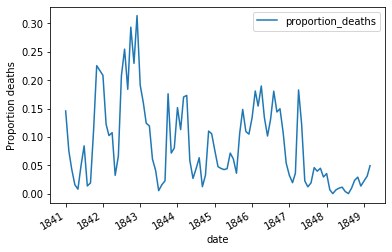

In [17]:
ax = monthly.plot(x="date", y="proportion_deaths")
ax.set_ylabel("Proportion deaths")

# Task 6: Instructions
Make a plot that highlights the effect of handwashing.
- Split monthly into before_washing (the rows in monthly before handwashing_start) and after_washing (the rows in monthly at and after handwashing_start).
- Plot proportion_deaths in before_washing and after_washing into the same plot. Use the DataFrame plot method.
- Label the plotted lines using the label argument to plot.
- Save the Axes object returned by the plot method into the variable ax.
- Change the y-axis label to "Proportion deaths".

In [30]:
monthly['year'] = pd.DatetimeIndex(monthly['date']).year
after_washing = monthly[monthly["year"] >= 1847]
before_washing = monthly[monthly["year"] < 1847]



Text(0, 0.5, 'Proportion deaths')

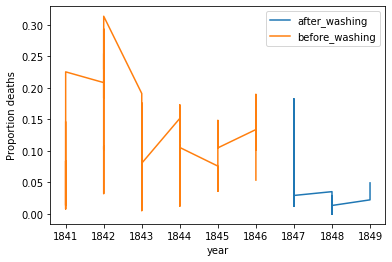

In [32]:
ax = after_washing.plot(x="year", y="proportion_deaths",
              label="after_washing")
before_washing.plot(x="year", y="proportion_deaths",
         label="before_washing", ax=ax)
ax.set_ylabel("Proportion deaths")

# Task 7: Instructions
Calculate the average reduction in proportion of deaths due to handwashing.
- Select the column proportion_deaths in before_washing and put it into before_proportion.
- Do the same for proportion_deaths in after_washing and put it into after_proportion.
- Calculate the difference in mean monthly proportion of deaths as mean after_proportion minus mean before_proportion.

In [33]:
before_proportion=before_washing['proportion_deaths']
after_proportion=after_washing['proportion_deaths']

In [35]:
diff_mean_monthly_proportion=after_proportion.mean()-before_proportion.mean()
diff_mean_monthly_proportion

-0.07519076642777145

# Task 8: Instructions
Make a bootstrap analysis of the difference in mean monthly proportion of deaths.
- boot_before and boot_after should be sampled with replacement from before_proportion and after_proportion.
- Append 3000 bootstrapped differences in means to boot_mean_diff.
- Calculate a 95% confidence_interval as the 2.5% and 97.5% quantiles of boot_mean_diff.

In [37]:
for i in range(2999):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after =after_proportion.sample(frac=1, replace=True)

In [39]:
boot_mean=boot_after.mean()-boot_before.mean()
boot_mean

-0.054249212291889504

In [40]:
pd.Series(boot_mean).quantile([0.025, 0.975])

0.025   -0.054249
0.975   -0.054249
dtype: float64

# Task 9: Instructions
Given the data Semmelweis collected, is it True or False that doctors should wash their hands?

In [41]:
True

True